# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison

## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_squared_log_error as msle, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

* ### Load Data

In [2]:
# read data from '.csv' files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# identify target
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [5]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [6]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [7]:
# target variable
target.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit', ylabel='Count'>

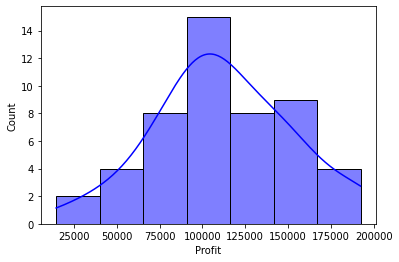

In [8]:
# visualisation of 'Profit' distribution
sns.histplot(target, stat='count', kde=True, color = 'Blue')

In [9]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [10]:
# check for Numerical and Categorical features in Train
train_cat_cols = train.dtypes[train.dtypes == object].index
test_cat_cols = test.dtypes[test.dtypes == object].index
print('Categorical features in Train: ', len(train_cat_cols))
print(train_cat_cols,'\n')
print('Categorical features in Test: ', len(test_cat_cols))
print(test_cat_cols)

Categorical features in Train:  2
Index(['State', 'Category'], dtype='object') 

Categorical features in Test:  2
Index(['State', 'Category'], dtype='object')


In [11]:
train_num_cols = train.dtypes[train.dtypes != object].index
test_num_cols = test.dtypes[test.dtypes != object].index
print('Numerical features in Train: ', len(train_num_cols))
print(train_num_cols,'\n')
print('Numerical features in Test: ', len(test_num_cols))
print(test_num_cols)

Numerical features in Train:  4
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object') 

Numerical features in Test:  3
Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [12]:
# check the Train features with missing values 
train_nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum(), '\n')
print('Columns in Train with missing value: ', len(train_nan_columns))

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64 

Columns in Train with missing value:  3


In [13]:
# check the Test features with missing values
test_nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum(), '\n')
print('Columns in Test with missing value: ', len(test_nan_columns))

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64 

Columns in Test with missing value:  3


#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'median';
* 'Administration': Numerical - replacement of NAN by 'median';
* 'Marketing Spend': Numerical - replacement of NAN by 'median';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [14]:
 # Numerical NAN columns to fill in Train and Test datasets
 # replace 'NAN' with 'mean' in these columns
for i in train_num_cols:
    train[i].fillna(train[i].median(), inplace = True)
    
for i in test_num_cols:
    test[i].fillna(test[i].median(), inplace = True)

# Categorical NAN columns to fill in Train and Test datasets
# replace 'NAN' with 'None' in these columns
for i in train_cat_cols:
    train[i].fillna('None', inplace = True)
    
for i in test_cat_cols:
    test[i].fillna('None', inplace = True)

In [15]:
# check is there any missing values left in Train
train.isnull().sum().sum()

0

In [16]:
# check is there any missing values left in Test
test.isnull().sum().sum()

0

#### Visualisation  of Numerical features (regplot)

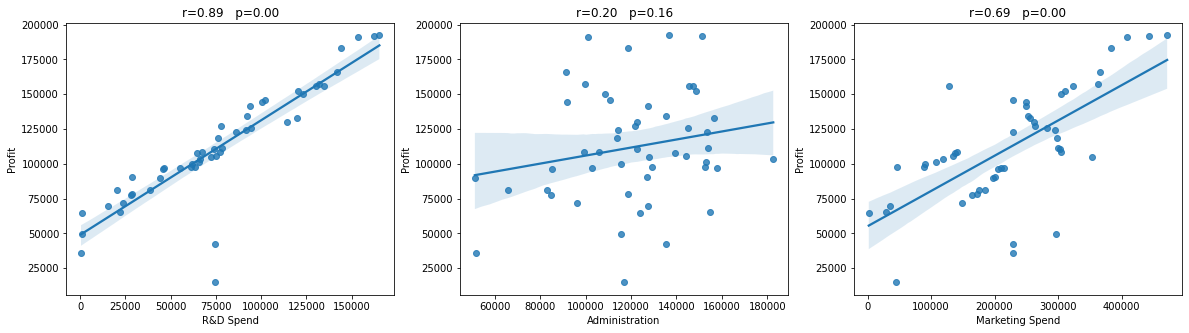

In [17]:
nrows = 1
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,5))
i = 0

for col in train_num_cols:
    if col == 'Profit':
        pass
    else:
        graph = sns.regplot(x=col, y=target, data=train, ax = axs[i])
        stat_vals = stats.pearsonr(train[col], target)
        graph_title = "r="+"{0:.2f}".format(stat_vals[0])+ "   " + "p=" + "{0:.2f}".format(stat_vals[1])
        graph.set_title(graph_title)
        i += 1

In [18]:
# plt.figure(figsize=(10,8))
# graph = sns.PairGrid(train, hue = 'Profit', palette='Blues_d', vars=train_num_cols)
# graph.map(sns.scatterplot)

<AxesSubplot:xlabel='State', ylabel='Profit'>

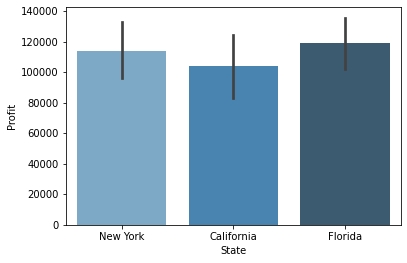

In [19]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x='State', y = 'Profit', data = train, palette= 'Blues_d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

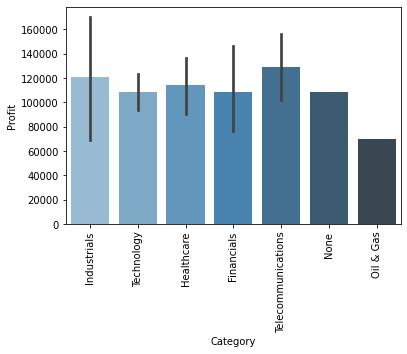

In [20]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x='Category', y = 'Profit', data = train, palette= 'Blues_d')
plt.xticks(rotation='90')

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [21]:
# One-Hot Encoding Train dataset
# One Hot-Encoding Test dataset

from sklearn.preprocessing import OneHotEncoder

def apply_ohe(df, column_names):
    ohe = OneHotEncoder()
    for column in column_names:
        columns_list = []
        matrix = ohe.fit_transform(df[[column]])
        matrix = matrix.toarray()
        ohe.categories_[0]
        for col in ohe.categories_[0]:
            columns_list.append(column+'_'+col)
        matrix_df = pd.DataFrame(matrix, columns = columns_list)
        matrix_df.index = df.index
        df = df.join(matrix_df)
        df = df.drop(columns=[column])
    return df

column_names = ['State', 'Category']
train = apply_ohe(train, column_names)
test = apply_ohe(test, column_names)

In [22]:
# Drop target variable 
train = train.drop(columns=['Profit'])

In [23]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
# Train data shape
train.shape

(50, 13)

In [25]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
# Test data shape
test.shape

(50, 13)

In [27]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler (optional)

Target is big, so there's no sense in standartizing X since it will basically lead to the situation when weights will increase due to that.

* ### Creating datasets for ML part

In [28]:
# set 'X' for features of Train dataset 'train'
X = train.copy()

# set 'y' for the target 'Profit'
y = target.copy()

# 'X_Test' for features of Test dataset 'test'
X_Test = test.copy()

* ### 'Train\Test' split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X_train.shape, X_test.shape

((35, 12), (15, 12))

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [32]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train, y_train)

# Model Prediction
LR_preds = LR.predict(X_test)

In [33]:
# Model R2 score
print('Train score: ', LR.score(X_train, y_train))
print('Validation score: ', LR.score(X_test, y_test))

Train score:  0.8184792343714404
Validation score:  0.7869678998290935


In [34]:
# Model Metrics
def calculate_metrics(y_true, y_pred, model_name):
    score_metrics = pd.DataFrame({'Model':model_name,
                          'r2score':r2(y_true, y_pred),
                          'MAE':mae(y_true, y_pred),
                          'MSE':mse(y_true, y_pred),
                          'RMSE':mse(y_true, y_pred, squared=False),
                          'MSLE':msle(y_true, y_pred),
                          'RSLE':msle(y_true, y_pred, squared=False)}, index=[1])
    return score_metrics

calculate_metrics(y_test, LR_preds, 'Linear Regression')

,Model,r2score,MAE,MSE,RMSE,MSLE,RSLE
1,Linear Regression,0.786968,14121.413142,2.997364e+08,17312.896215,0.038104,0.195204


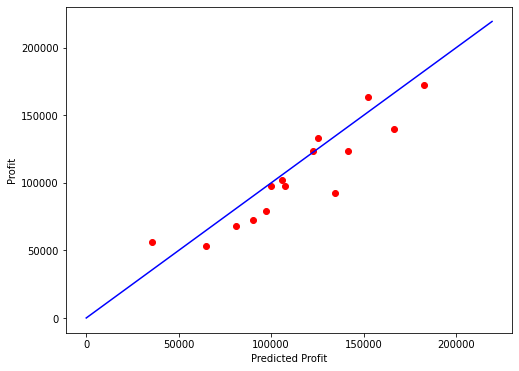

In [35]:
# visualisation of Train dataset predictions
# Plot outputs
plt.figure(figsize=(8,6))
pl.plot(y_test, LR_preds,'ro')
if y_test.max()>=LR_preds.max():
    max_val =y_test.max()
else:
    max_val =LR_preds.max()
pl.plot([0,max_val*1.2],[0,max_val*1.2],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [36]:
# Test final predictions
LR_test_preds = LR.predict(X_Test)

In [37]:
# Model Metrics
LR_metrics = calculate_metrics(y, LR_test_preds, 'Linear Regression')
LR_metrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RSLE
1,Linear Regression,0.825698,12080.65886,2.775055e+08,16658.496169,0.072019,0.268364


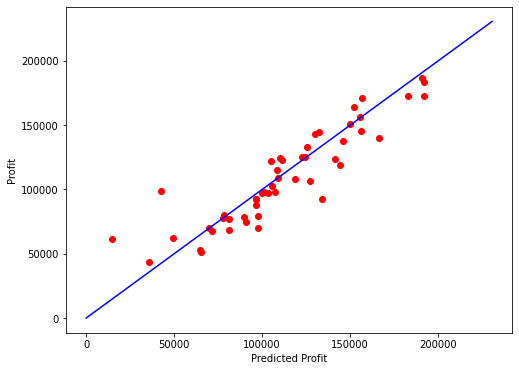

In [38]:
# visualisation of Test dataset predictions
# Plot outputs
def plot_outputs(y_true, y_pred):
    plt.figure(figsize=(8,6))
    pl.plot(y, y_pred,'ro')
    if y_true.max()>=y_pred.max():
        max_val = y_true.max()
    else:
        max_val = y_true.max()
    pl.plot([0,max_val*1.2],[0,max_val*1.2],'b-')
    pl.xlabel('Predicted Profit')
    pl.ylabel('Profit')
    pl.show()
    
plot_outputs(y, LR_test_preds)

In [39]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
df_comparison = pd.DataFrame({'Actual Profit':y, 'Predicted Test Profit':LR_test_preds})
df_comparison.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,Predicted Test Profit
0,192261.830000,173056.751383
1,191792.060000,183346.029990
2,191050.390000,186417.284324
3,182901.990000,172778.586661
4,166187.940000,139866.895721
5,156991.120000,171055.995142
6,156122.510000,145857.164468
7,155752.600000,156709.005781
8,152211.770000,163815.687575
9,149759.960000,151115.103236


* #### Gradient Boosting Regressor

In [40]:
# Gradient Boosting Regressor model
GB = GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train, y_train)

# Model Prediction
GB_preds = GB.predict(X_test)

# Model R2 score
print('Train score: ', GB.score(X_train, y_train))
print('Validation score: ', GB.score(X_test, y_test))

Train score:  0.999960429944915
Validation score:  0.7850333100469008


In [41]:
# Model Metrics
calculate_metrics(y_test, GB_preds, 'Gradient Boosting Regressor')

,Model,r2score,MAE,MSE,RMSE,MSLE,RSLE
1,Gradient Boosting Regressor,0.785033,13469.970427,3.024583e+08,17391.329595,0.046654,0.215994


In [42]:
# Test final predictions
GB_test_preds = GB.predict(X_Test)

In [43]:
# Model Metrics
GB_metrics = calculate_metrics(y, GB_test_preds, 'Gradient Boosting Regressor')
GB_metrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RSLE
1,Gradient Boosting Regressor,0.938896,4647.626899,9.728298e+07,9863.213436,0.016218,0.127351


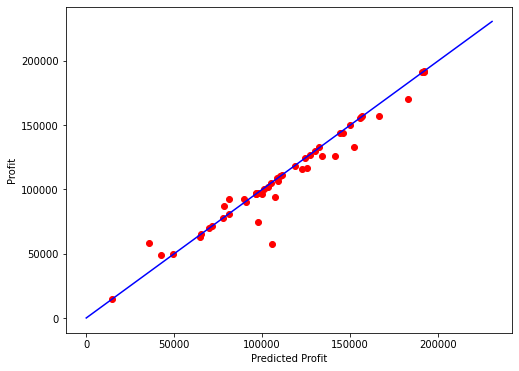

In [44]:
# visualisation of Test dataset predictions
# Plot outputs
plot_outputs(y, GB_test_preds)

### Model comparison

In [45]:
# score comparison of models
TrainingResult = pd.concat([LR_metrics, GB_metrics])
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RSLE
1,Linear Regression,0.825698,12080.658860,2.775055e+08,16658.496169,0.072019,0.268364
1,Gradient Boosting Regressor,0.938896,4647.626899,9.728298e+07,9863.213436,0.016218,0.127351


In [46]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
df_comparison = pd.DataFrame({'Actual Profit':y, 'Predicted LR Profit':LR_test_preds, 
                              'Predicted GB Profit':GB_test_preds})
df_comparison.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,Predicted LR Profit,Predicted GB Profit
0,192261.830000,173056.751383,192155.666509
1,191792.060000,183346.029990,191611.519006
2,191050.390000,186417.284324,191060.773240
3,182901.990000,172778.586661,170144.309248
4,166187.940000,139866.895721,157194.456630
5,156991.120000,171055.995142,156891.273714
6,156122.510000,145857.164468,156119.707102
7,155752.600000,156709.005781,155663.111853
8,152211.770000,163815.687575,133422.259313
9,149759.960000,151115.103236,149987.217122


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.938896**.

##  Conclusion

In [47]:
# submission of .csv file with final predictions
submission_data = pd.DataFrame()
submission_data['ID'] = test.index
submission_data['Profit'] = GB_test_preds
submission_data.to_csv('Startup_Predictions.csv', index=False)